# **CREDIT RISK MODELLING**

---



---

##**INTRODUCTION**

---



---

Credit risk modelling refers to estimating the risk associated with lending credit to a borrower.
 If the lender fails to detect the credit risk in advance, it exposes them to the risk of default and loss of funds, thats why Lenders rely on the validation provided by credit risk analysis models to make key lending decisions on whether or not to extend credit to the borrower and the credit to be charged.

The probability of default, sometimes abbreviated as POD, is the likelihood that a borrower will default on their loan obligations.

#### **Project Overview**

In this project, different learning algorithms including KNN, Logistic regression, decision tree, and random forest have been used to find the best algorithm for credit risk . SMOTE has been used for handling the imbalanced data. KNN Imputer is used for imputing the missing values.

#### **Dataset and features**

The dataset for this credit risk modelling project has been taken from kaggle.The dataset classifies the credit risk of borrower with respect to various features such as Age , Income , Employment length , Home ownership and other attributes of loan such as Interest Rate , Purpose etc.

**Importing Libraries**

In [368]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

In [369]:
from google.colab import files
uploaded = files.upload()

Saving credit_risk_dataset.csv to credit_risk_dataset.csv


In [370]:
import io
df_loan = pd.read_csv(io.BytesIO(uploaded['credit_risk_dataset.csv']))

In [371]:
df_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [372]:
print('The shape of our data is:', df_loan.shape)

The shape of our data is: (32581, 12)


## **DATA PREPROCESSING**

---



---



Using pandas for data cleaning and data manipulation

### Duplicate rows

In [373]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [374]:
# Checking Duplicates
duplicate = df_loan[df_loan.duplicated()]
duplicate.shape[0]


165

In [375]:
df_loan.drop_duplicates(inplace= True)

print('The shape of the data after removal of duplicate rows is:', df_loan.shape)

The shape of the data after removal of duplicate rows is: (32416, 12)


###**Exploratory Data Analysis**

---



####**Numerical Features**

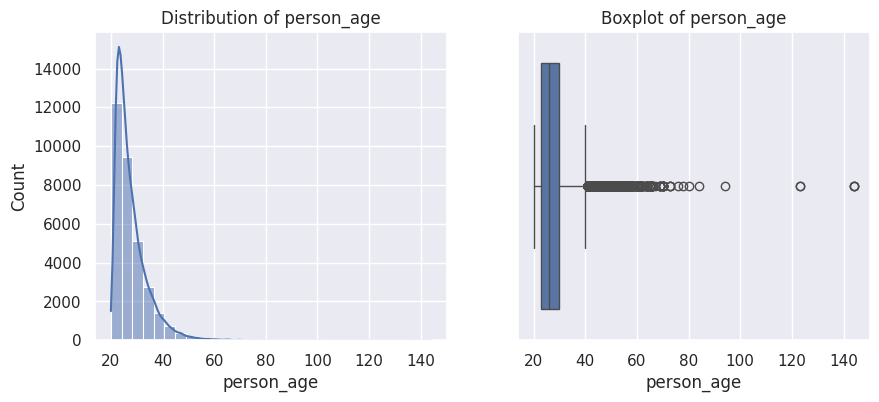

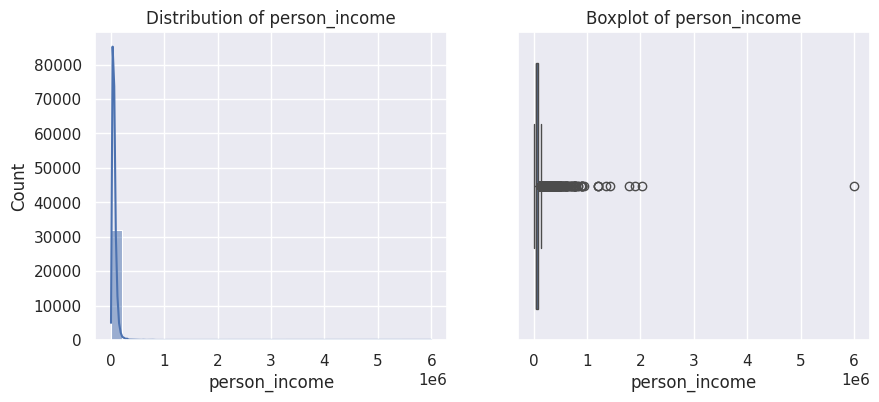

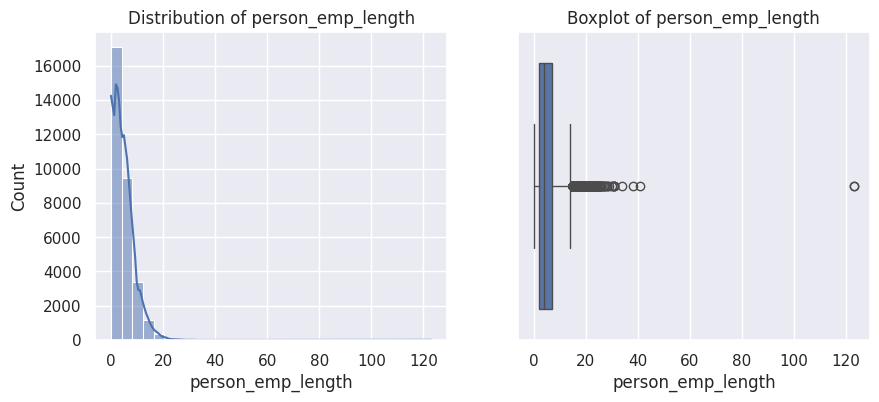

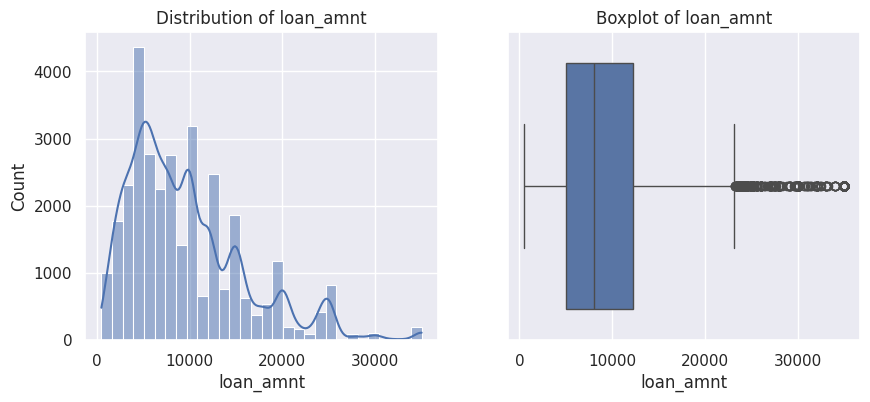

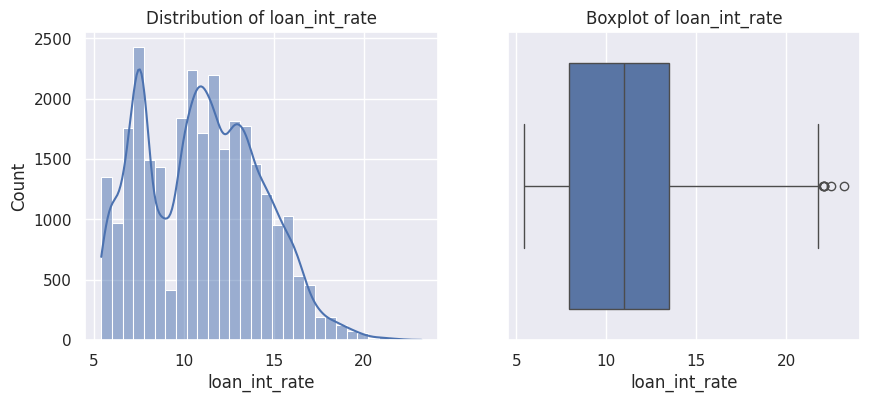

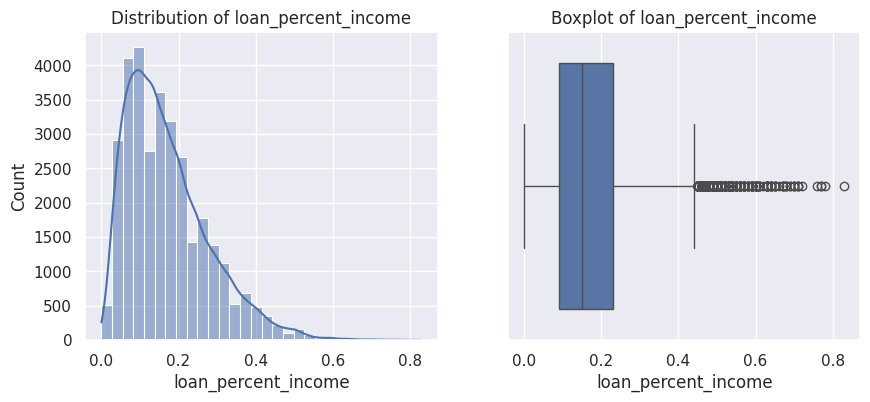

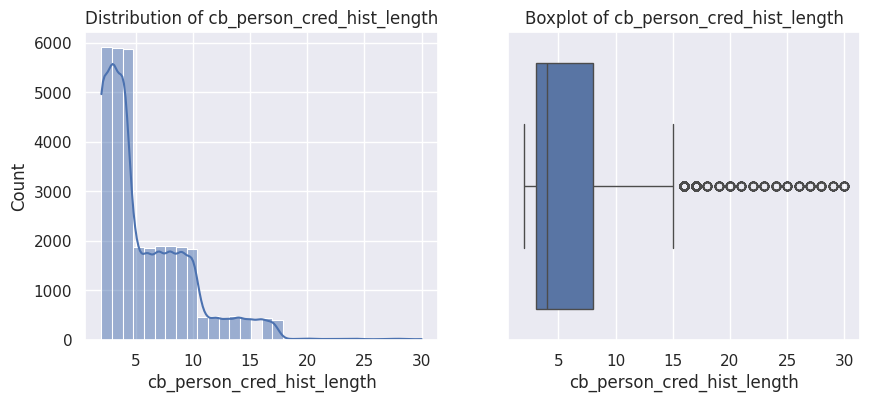

In [376]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']

for col in num_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df_loan[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')

    plt.subplot(1,2,2)
    sns.boxplot(x=df_loan[col])
    plt.title(f'Boxplot of {col}')

    plt.show()


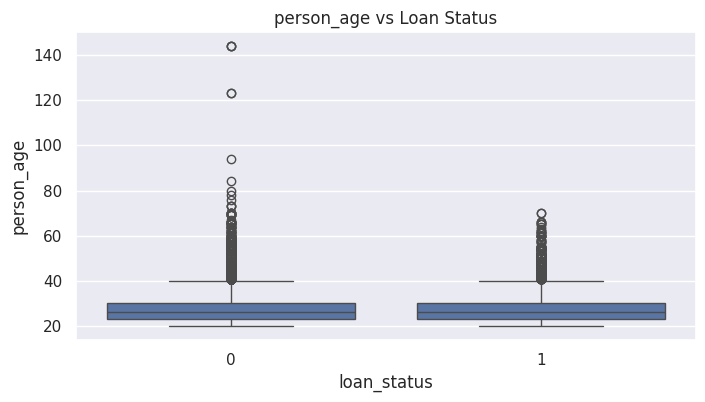

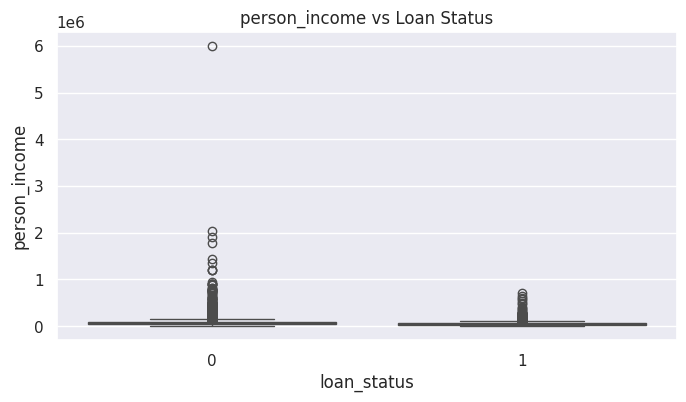

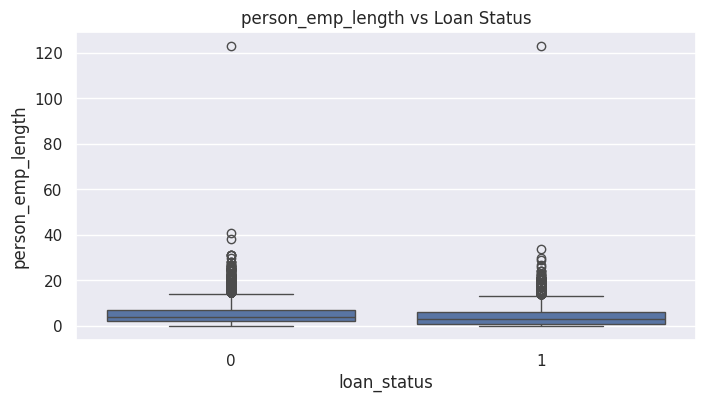

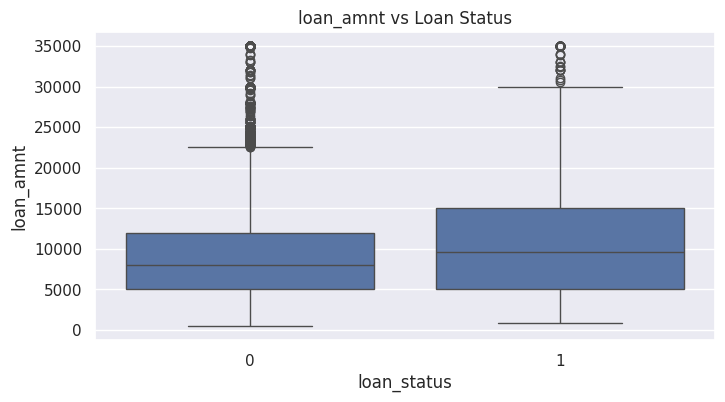

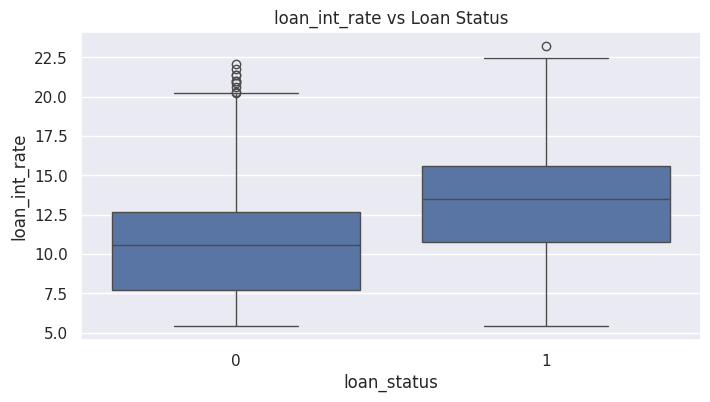

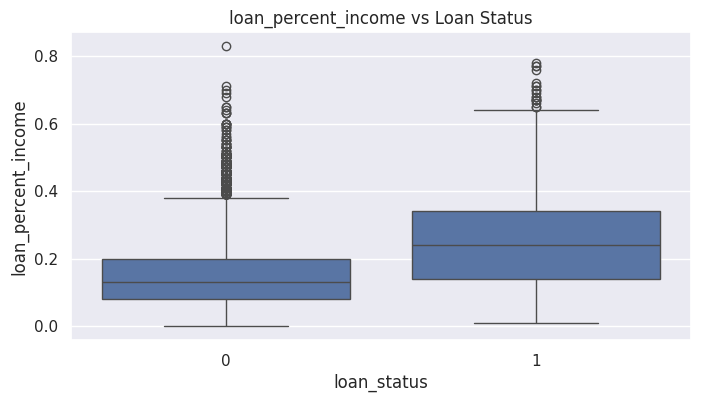

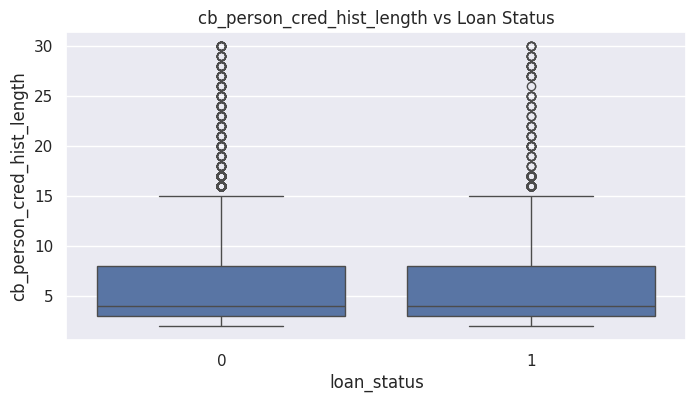

In [377]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='loan_status', y=col, data=df_loan)
    plt.title(f"{col} vs Loan Status")
    plt.show()

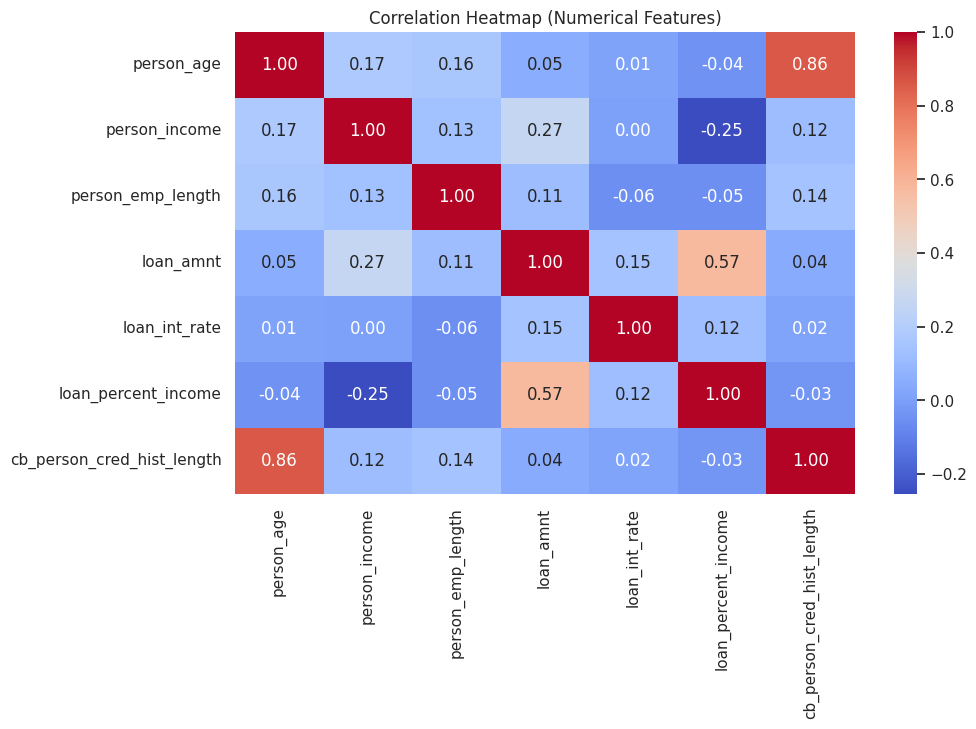

In [378]:
plt.figure(figsize=(10,6))
sns.heatmap(df_loan[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


####**Categorical Features**



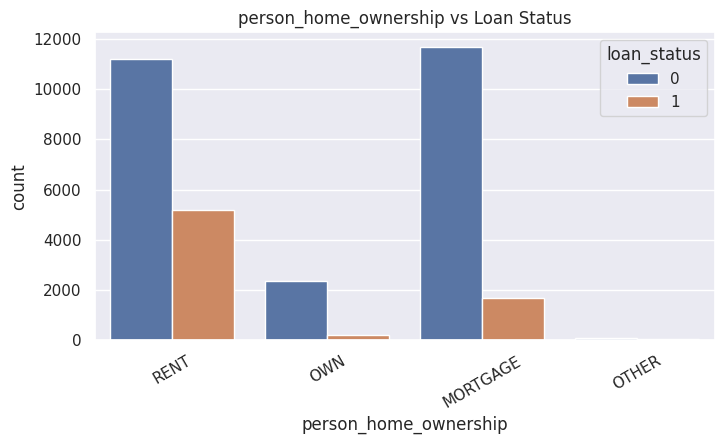

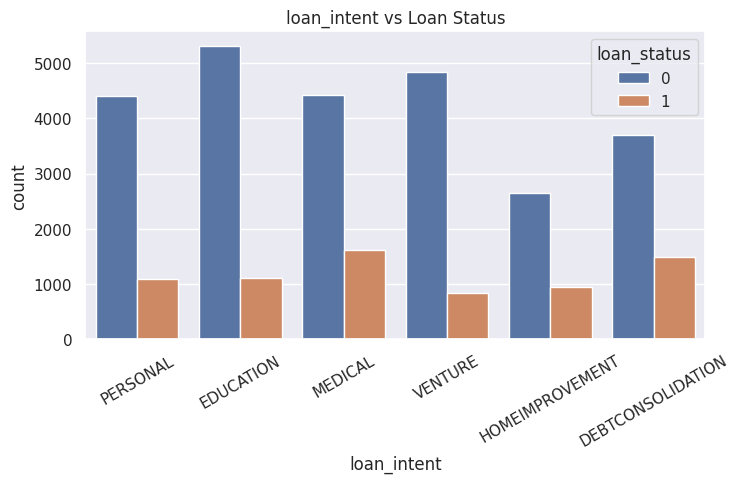

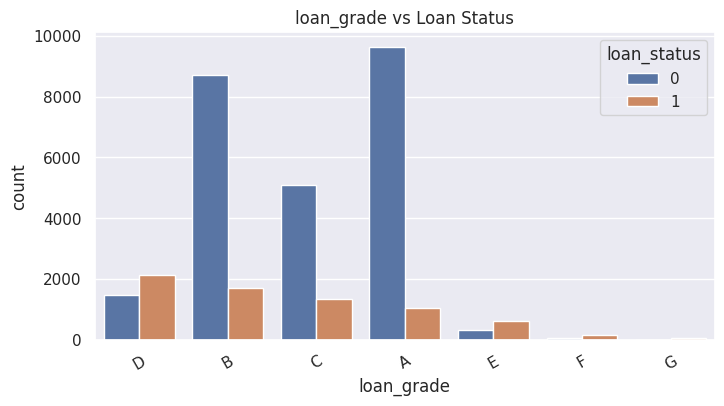

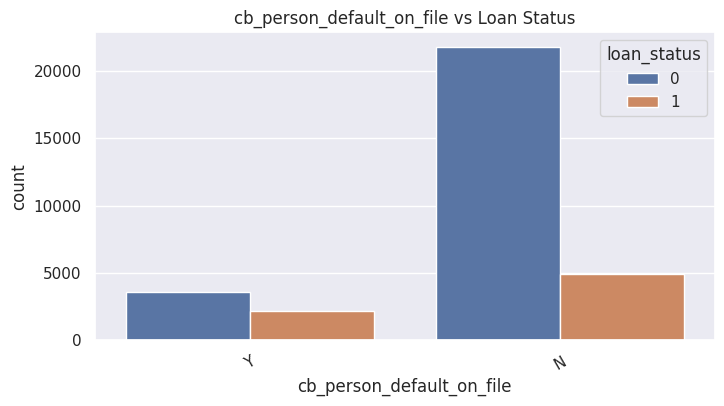

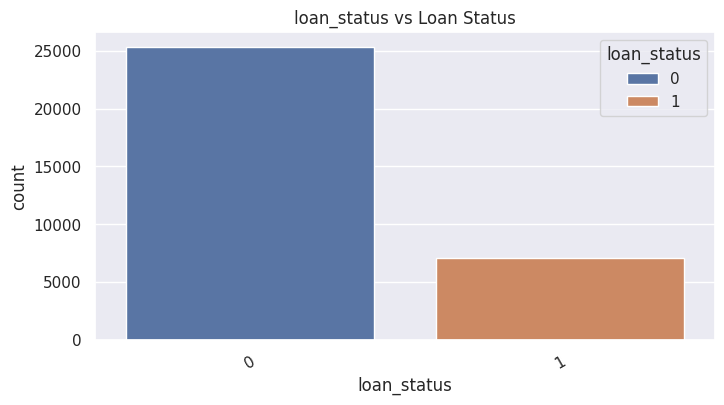

In [379]:
cat_cols = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file','loan_status']

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_loan, x=col, hue='loan_status')  # compare with loan_status
    plt.title(f'{col} vs Loan Status')
    plt.xticks(rotation=30)
    plt.show()


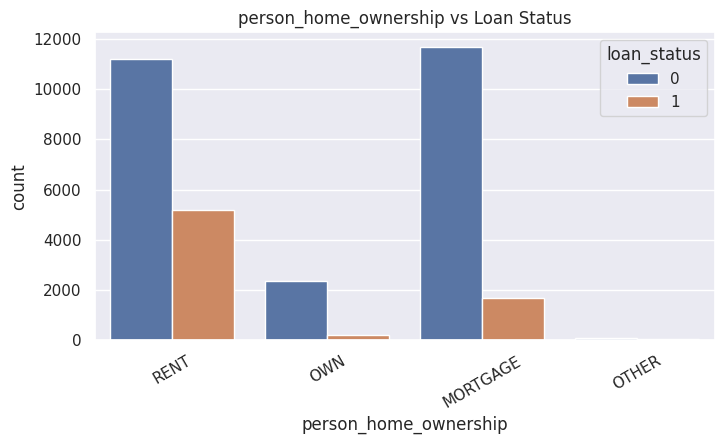

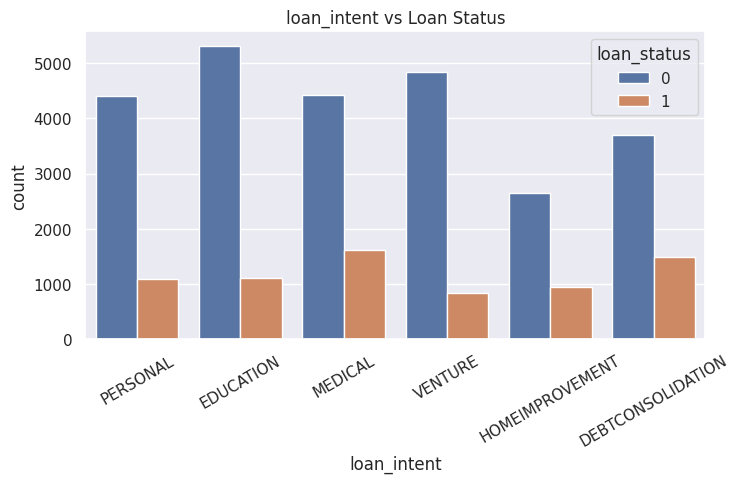

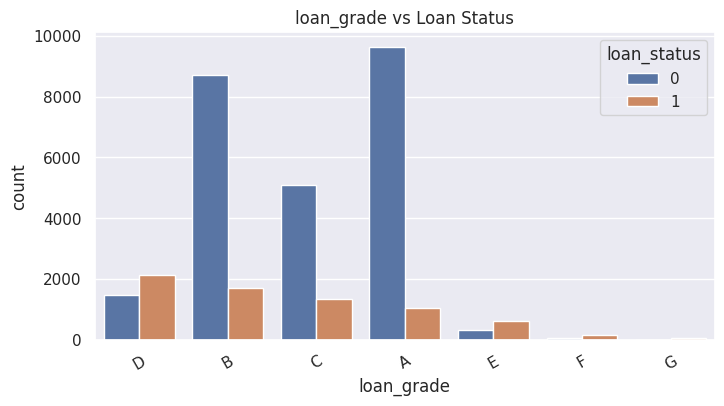

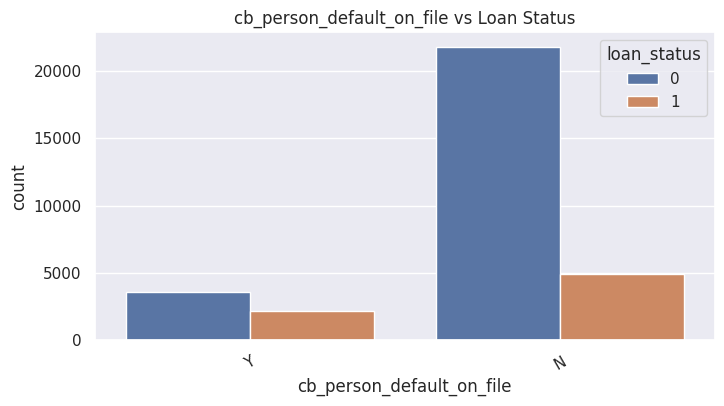

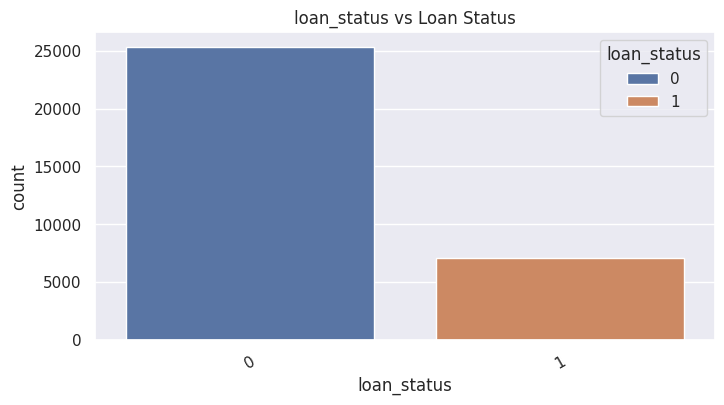

In [380]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data = df_loan, x = col, hue = "loan_status")
    plt.title(f"{col} vs Loan Status")
    plt.xticks(rotation=30)
    plt.show()

### Handeling Outliers

In [381]:
df_loan['loan_status'].value_counts(normalize=True) * 100


,proportion
loan_status,
0,78.13117
1,21.86883


In [382]:
Q1 = df_loan[num_cols].quantile(0.25)
Q3 = df_loan[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_loan[num_cols] < (Q1 - 1.5*IQR)) | (df_loan[num_cols] > (Q3 + 1.5*IQR))).sum()
print(outliers)


person_age                    1491
person_income                 1478
person_emp_length              852
loan_amnt                     1679
loan_int_rate                    6
loan_percent_income            650
cb_person_cred_hist_length    1139
dtype: int64


In [383]:
df_loan[num_cols].skew().sort_values()


,0
loan_int_rate,0.207002
loan_percent_income,1.063811
loan_amnt,1.191944
cb_person_cred_hist_length,1.659369
person_age,2.580490
person_emp_length,2.619915
person_income,32.958748


### Feature Engineering

In [384]:
df_loan['debt_to_income'] = df_loan['loan_amnt'] / df_loan['person_income']
df_loan['age_group'] = pd.cut(df_loan['person_age'], bins=[18, 25, 35, 50, 100],
                         labels=['Young', 'Mid_Age', 'Adult', 'Senior'])
df_loan['emp_length_cat'] = pd.cut(df_loan['person_emp_length'],
                              bins=[0, 2, 5, 10, 50],
                              labels=['Short', 'Medium', 'Long', 'Very_Long'])


## **Encoding the categorical data**

---



---



In [385]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  32416 non-null  int64   
 1   person_income               32416 non-null  int64   
 2   person_home_ownership       32416 non-null  object  
 3   person_emp_length           31529 non-null  float64 
 4   loan_intent                 32416 non-null  object  
 5   loan_grade                  32416 non-null  object  
 6   loan_amnt                   32416 non-null  int64   
 7   loan_int_rate               29321 non-null  float64 
 8   loan_status                 32416 non-null  int64   
 9   loan_percent_income         32416 non-null  float64 
 10  cb_person_default_on_file   32416 non-null  object  
 11  cb_person_cred_hist_length  32416 non-null  int64   
 12  debt_to_income              32416 non-null  float64 
 13  age_group            

In [386]:
import pandas as pd

# 1. person_home_ownership (ordinal-ish: OTHER < RENT < MORTGAGE < OWN)
home_map = {"OTHER": 0, "RENT": 1, "MORTGAGE": 2, "OWN": 3}
df_loan["person_home_ownership"] = df_loan["person_home_ownership"].map(home_map)

# 2. loan_intent (nominal → One-Hot Encoding)
df_loan = pd.get_dummies(df_loan, columns=["loan_intent"], drop_first=True)

# 3. loan_grade (ordinal A < B < C < ... < G)
grade_order = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7}
df_loan["loan_grade"] = df_loan["loan_grade"].map(grade_order)

# 4. cb_person_default_on_file (binary: Y/N → 1/0)
df_loan["cb_person_default_on_file"] = df_loan["cb_person_default_on_file"].map({"Y": 1, "N": 0})


age_map = {"Young": 1, "Mid_Age": 2, "Adult": 3, "Senior": 4}
df_loan["age_group"] = df_loan["age_group"].map(age_map)


emp_map = {"Short": 1, "Medium": 2, "Long": 3, "Very_Long": 4}
df_loan["emp_length_cat"] = df_loan["emp_length_cat"].map(emp_map)

# Final check
df_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,debt_to_income,age_group,emp_length_cat,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,1,123.0,4,35000,16.02,1,0.59,1,3,0.593220,1,NaN,False,False,False,True,False
1,21,9600,3,5.0,2,1000,11.14,0,0.10,0,2,0.104167,1,2,True,False,False,False,False
2,25,9600,2,1.0,3,5500,12.87,1,0.57,0,3,0.572917,1,1,False,False,True,False,False
3,23,65500,1,4.0,3,35000,15.23,1,0.53,0,2,0.534351,1,2,False,False,True,False,False
4,24,54400,1,8.0,3,35000,14.27,1,0.55,1,4,0.643382,1,3,False,False,True,False,False


In [387]:
print("\nEncoded dataframe shape:", df_loan.shape)


Encoded dataframe shape: (32416, 19)


## **Imputing the missing values**

---



---



In [388]:
# Checking Missing Values
df_loan.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,887
loan_grade,0
loan_amnt,0
loan_int_rate,3095
loan_status,0
loan_percent_income,0
cb_person_default_on_file,0


In [389]:
# Calculate percentage of missing values
missing_percent = (df_loan.isnull().mean() * 100).round(2)

# Filter only columns with missing values
missing_percent = missing_percent[missing_percent > 0]

print("Percentage of missing values per column:\n")
print(missing_percent)


Percentage of missing values per column:

person_emp_length     2.74
loan_int_rate         9.55
age_group             0.02
emp_length_cat       15.35
dtype: float64


In [390]:
# # Since it has lower percentage of missing value we fill missing value with the median
df_loan['person_emp_length'].fillna(df_loan['person_emp_length'].median(), inplace=True)


In [391]:
pd.DataFrame(df_loan.isnull().sum())

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_grade,0
loan_amnt,0
loan_int_rate,3095
loan_status,0
loan_percent_income,0
cb_person_default_on_file,0


The missing values of **loan_int_rate** should be handled using KNN imputer but before that we should do some exploratory data analysis on our data so as to discover some patterns.

In [392]:
#Importing KNN Imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=15)
df_loan = pd.DataFrame(imputer.fit_transform(df_loan),columns = df_loan.columns)

In [393]:
df_loan.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0
cb_person_default_on_file,0


In [394]:
df_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,debt_to_income,age_group,emp_length_cat,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,59000.0,1.0,123.0,4.0,35000.0,16.02,1.0,0.59,1.0,3.0,0.593220,1.0,2.666667,0.0,0.0,0.0,1.0,0.0
1,21.0,9600.0,3.0,5.0,2.0,1000.0,11.14,0.0,0.10,0.0,2.0,0.104167,1.0,2.000000,1.0,0.0,0.0,0.0,0.0
2,25.0,9600.0,2.0,1.0,3.0,5500.0,12.87,1.0,0.57,0.0,3.0,0.572917,1.0,1.000000,0.0,0.0,1.0,0.0,0.0
3,23.0,65500.0,1.0,4.0,3.0,35000.0,15.23,1.0,0.53,0.0,2.0,0.534351,1.0,2.000000,0.0,0.0,1.0,0.0,0.0
4,24.0,54400.0,1.0,8.0,3.0,35000.0,14.27,1.0,0.55,1.0,4.0,0.643382,1.0,3.000000,0.0,0.0,1.0,0.0,0.0


## **Checking the data for outliers**

---



---



In [395]:
df_loan.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,debt_to_income,age_group,emp_length_cat,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
count,32416.000000,3.241600e+04,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,1.567282,4.768880,2.220508,9593.845632,11.014780,0.218688,0.170250,0.176765,5.811297,0.170599,1.645054,2.250317,0.197773,0.110871,0.186389,0.169608,0.175284
std,6.354100,6.201558e+04,0.640435,4.090411,1.167293,6322.730241,3.104112,0.413363,0.106812,0.381475,4.059030,0.107081,0.690753,0.889001,0.398326,0.313977,0.389427,0.375293,0.380216
min,20.000000,4.000000e+03,0.000000,0.000000,1.000000,500.000000,5.420000,0.000000,0.000000,0.000000,2.000000,0.000789,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.854200e+04,1.000000,2.000000,1.000000,5000.000000,8.490000,0.000000,0.090000,0.000000,3.000000,0.089711,1.000000,1.866667,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,5.500000e+04,1.000000,4.000000,2.000000,8000.000000,10.990000,0.000000,0.150000,0.000000,4.000000,0.148148,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,7.921800e+04,2.000000,7.000000,3.000000,12250.000000,13.160000,0.000000,0.230000,0.000000,8.000000,0.229167,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,144.000000,6.000000e+06,3.000000,123.000000,7.000000,35000.000000,23.220000,1.000000,0.830000,1.000000,30.000000,0.830000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Clearly the maximum values in *person_age* , *person_income* and *person_emp_length* are outliers. We need to analyse these features in detail so as to remove the outliers . We can draw boxplots for all these features to analyse them one by one.

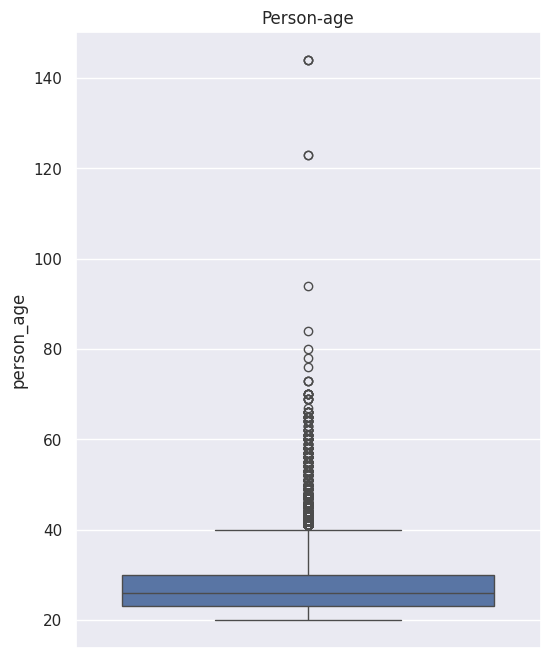

In [396]:
# Outliers in the age column

plt.figure(figsize=(6,8))
sns.boxplot(y='person_age', data=df_loan)
plt.title('Person-age');

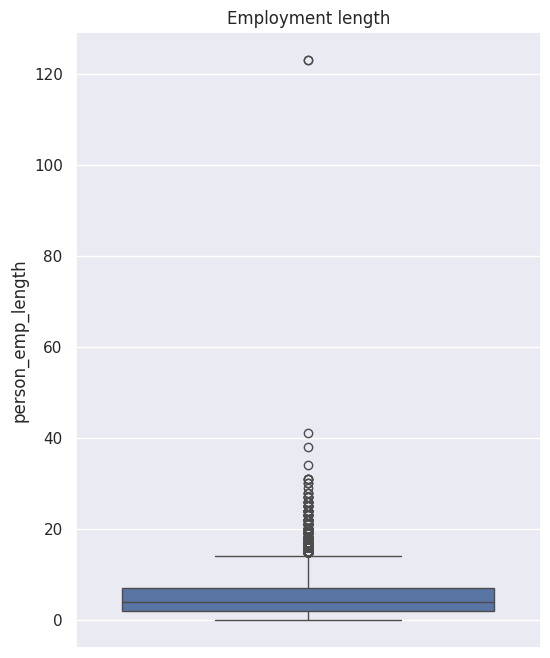

In [397]:
#Outliers in Employment Length Column

plt.figure(figsize=(6,8))
sns.boxplot(y='person_emp_length', data=df_loan)
plt.title('Employment length');

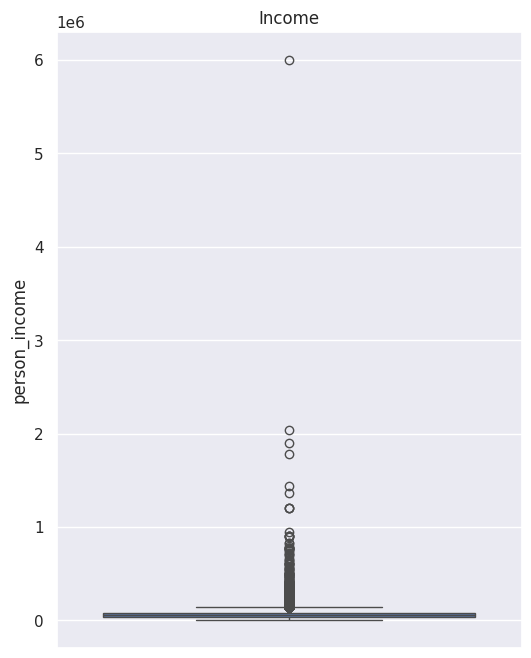

In [398]:
#Outliers in Income Column

plt.figure(figsize=(6,8))
sns.boxplot(y='person_income', data=df_loan)
plt.title('Income');

### **Observations**

**person_age**: Most people are 20 to 60 years old. In the following analysis,  *people age > 100* should be droped.

**person_emp_length**: Most people have less than 40 years of employment. People with *employment > 70* years should be droped.

**person_income**: It seems that there are outliers which has to be removed (*income> 5 million*).

For all other variables, the distribution is more uniform across the whole range.

In [399]:
# clean the dataset and drop outliers

df_loan= df_loan[df_loan['person_age']<=100]
df_loan = df_loan[df_loan['person_emp_length']<=70]
df_loan = df_loan[df_loan['person_income']<=5e6]

## **Scaling the Data**

---



---



In [400]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df_loan[df_loan.columns]=scaler.fit_transform(df_loan[df_loan.columns])

In [401]:
df_loan.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,debt_to_income,age_group,emp_length_cat,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
count,32409.000000,32409.000000,32409.000000,32409.000000,32409.000000,32409.000000,32409.000000,32409.000000,32409.000000,32409.000000,32409.000000,32409.000000,32409.000000,32409.000000,32409.000000,32409.000000,32409.000000,32409.000000,32409.000000
mean,0.104470,0.030403,0.522437,0.116132,0.203411,0.263550,0.314302,0.218705,0.205118,0.176772,0.136114,0.204782,0.215002,0.416753,0.197754,0.110895,0.186430,0.169583,0.175229
std,0.083925,0.025797,0.213487,0.097165,0.194557,0.183214,0.174391,0.413374,0.128657,0.381481,0.144925,0.129103,0.230248,0.296331,0.398312,0.314007,0.389459,0.375271,0.380169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040541,0.016947,0.333333,0.048780,0.000000,0.130435,0.172472,0.000000,0.108434,0.000000,0.035714,0.107250,0.000000,0.288889,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.081081,0.025052,0.333333,0.097561,0.166667,0.217391,0.312921,0.000000,0.180723,0.000000,0.071429,0.177710,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.135135,0.036939,0.666667,0.170732,0.333333,0.340580,0.434831,0.000000,0.277108,0.000000,0.214286,0.275415,0.333333,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Splitting the training and testing data**

In [402]:
X, y = df_loan.drop("loan_status", axis=1), df_loan["loan_status"]

In [403]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=0)

In [404]:
print('The shape of our training data is:', X_train.shape)

The shape of our training data is: (25927, 18)


In [405]:
print('The shape of our test data is:', X_test.shape)

The shape of our test data is: (6482, 18)


#**Training the data**

We focused on four kinds of algorithms: KNN, Random-Forest, Logistic Regression Decision Trees to predict credit risk. We then evaluated our models' performances using Classification Report and Confusion Matrix.

In [406]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

## **1. K Nearest Neighbors**

KNN uses proximity to make classifications or predictions about the grouping of an individual data point.

The parameter k in kNN refers to the number of labeled points (neighbors) considered for classification. The value of k indicates the number of these points used to determine the result. Our task is to calculate the distance and identify which categories are closest to our unknown entity.



In [407]:
max_score = 0
max_k = 0
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train,y_train)
    score = recall_score(y_test, neigh.predict(X_test),average='micro')
    if score > max_score:
        max_k = k
        max_score = score

In [408]:
print('If we use K-Nearest Neighbors Classification, then the value of K is',str(max_k),' to get the best prediction, then the average accuracy is ', max_score)

If we use K-Nearest Neighbors Classification, then the value of K is 7  to get the best prediction, then the average accuracy is  0.8852206109225548


In [409]:
#KNN
knn_model= KNeighborsClassifier(n_neighbors=max_k)
knn_model.fit(X_train,y_train)
knn_y_pred=knn_model.predict(X_test)
print('KNN\n', classification_report(y_test,knn_y_pred))

KNN
               precision    recall  f1-score   support

         0.0       0.89      0.98      0.93      5065
         1.0       0.88      0.55      0.68      1417

    accuracy                           0.89      6482
   macro avg       0.88      0.76      0.80      6482
weighted avg       0.89      0.89      0.87      6482



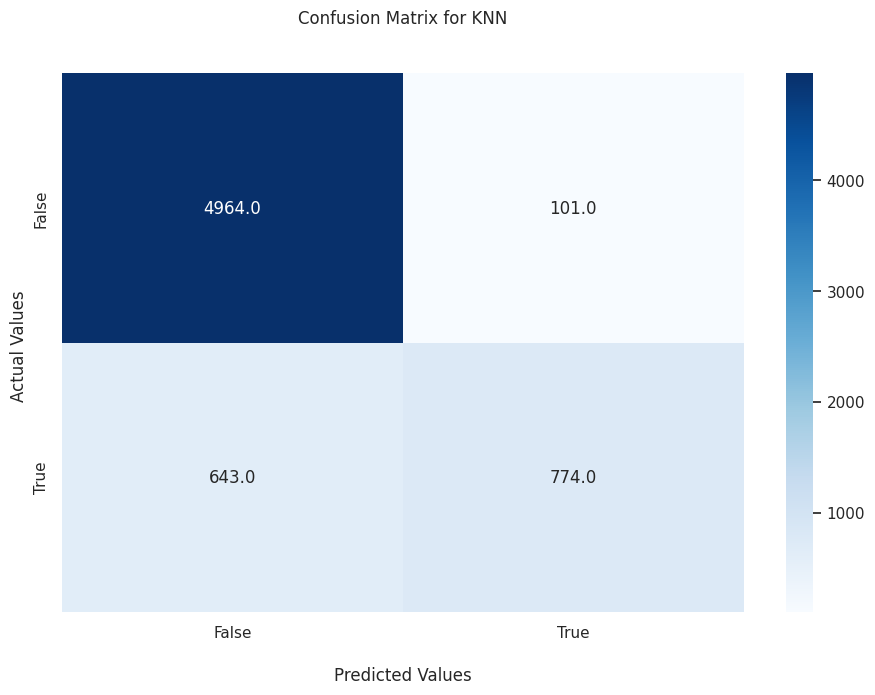

In [410]:
import seaborn as sns
cf_matrix = confusion_matrix(y_test, knn_y_pred)
ax = sns.heatmap(cf_matrix, annot=True, fmt=".1f",cmap='Blues')

ax.set_title('Confusion Matrix for KNN\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

## **2. Logistic Regression**



Logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

In [411]:
#Logistic Regression
LR_model= LogisticRegression()
LR_model.fit(X_train,y_train)
LR_y_pred=LR_model.predict(X_test)
print('Logistic Regression\n', classification_report(y_test,LR_y_pred))

Logistic Regression
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      5065
         1.0       0.73      0.51      0.60      1417

    accuracy                           0.85      6482
   macro avg       0.80      0.73      0.75      6482
weighted avg       0.84      0.85      0.84      6482



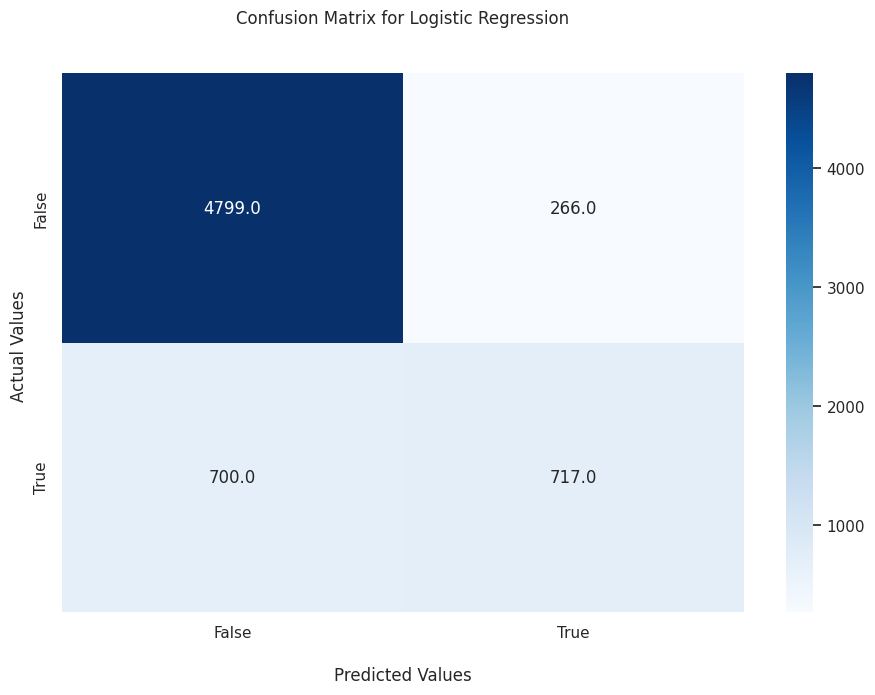

In [412]:
cf_matrix = confusion_matrix(y_test, LR_y_pred)
ax = sns.heatmap(cf_matrix, annot=True, fmt=".1f",cmap='Blues')

ax.set_title('Confusion Matrix for Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

## **3. Decision Tree**

It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

Decision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.

In [413]:
#Decision Tree
decisiontree_model= DecisionTreeClassifier()
decisiontree_model.fit(X_train,y_train)
decisiontree_y_pred=decisiontree_model.predict(X_test)
print('Decision Tree\n', classification_report(y_test,decisiontree_y_pred))

Decision Tree
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.93      5065
         1.0       0.75      0.79      0.77      1417

    accuracy                           0.90      6482
   macro avg       0.84      0.86      0.85      6482
weighted avg       0.90      0.90      0.90      6482



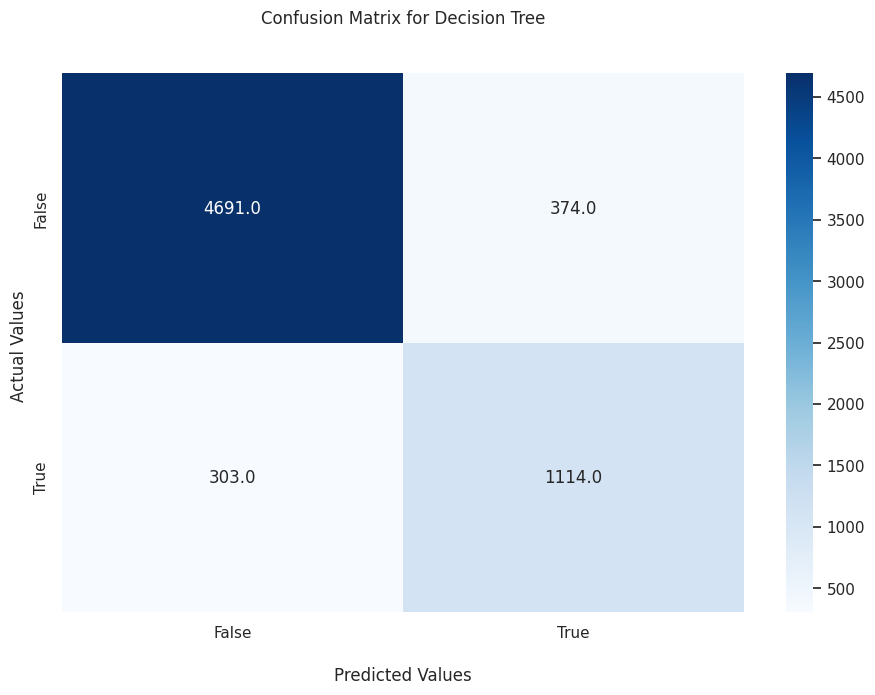

In [414]:
cf_matrix = confusion_matrix(y_test, decisiontree_y_pred)
ax = sns.heatmap(cf_matrix, annot=True, fmt=".1f",cmap='Blues')

ax.set_title('Confusion Matrix for Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

## **4. Random Forest Classifier**

It is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and Bootstrap Aggregation.

The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

In [415]:
# Random Forest Classifier
forest_model=  RandomForestClassifier()
forest_model.fit(X_train,y_train)
forest_y_pred=forest_model.predict(X_test)
print('Random Forest\n', classification_report(y_test, forest_y_pred))

Random Forest
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      5065
         1.0       0.97      0.73      0.83      1417

    accuracy                           0.94      6482
   macro avg       0.95      0.86      0.90      6482
weighted avg       0.94      0.94      0.93      6482



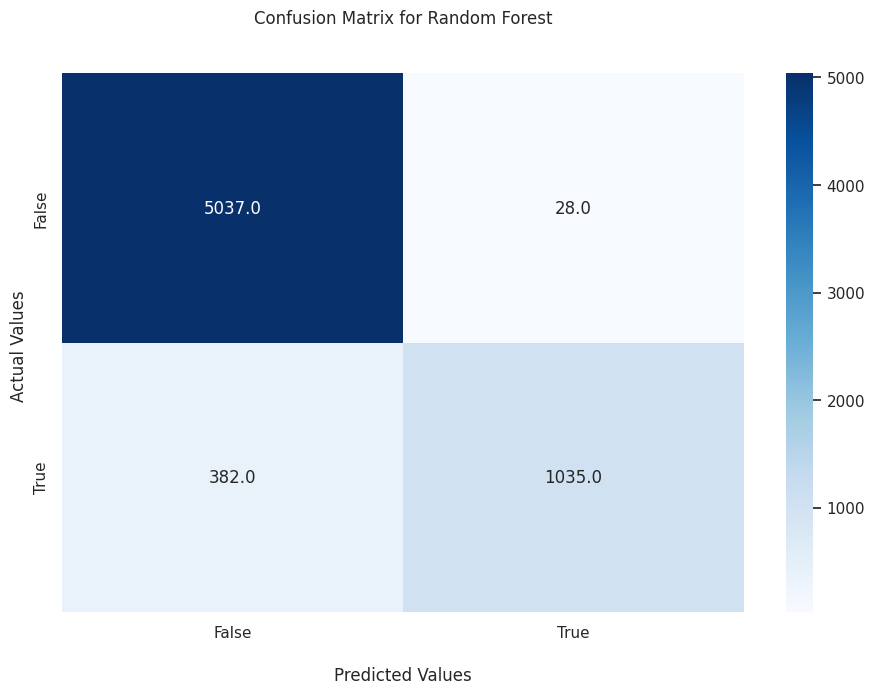

In [416]:
cf_matrix = confusion_matrix(y_test, forest_y_pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt=".1f",cmap='Blues')

ax.set_title('Confusion Matrix for Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

# **Handling the imperfect dataset**

---



---



In [417]:
y.value_counts()

,count
loan_status,
0.0,25321
1.0,7088


**The dataset we worked on till now was imperfect as it has only 7107 rows of Fraud out of 32574 rows, We handle it to get effiicient results.**

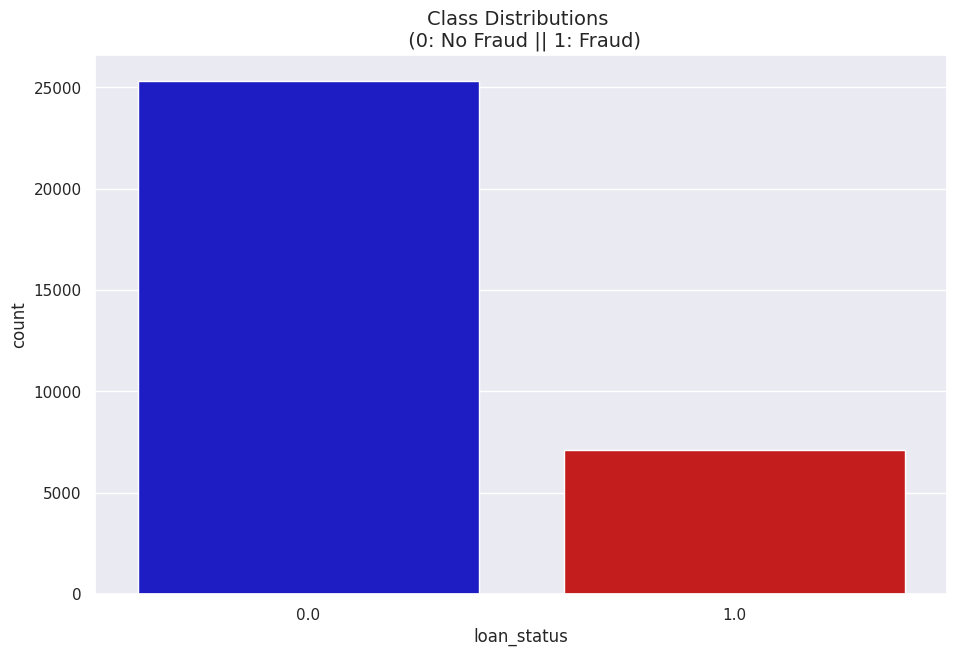

In [418]:

colors = ["#0101DF", "#DF0101"]

sns.countplot(x='loan_status', data=df_loan, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14);
colors = ["#0101DF", "#DF0101"]

## **SMOTE Oversampling**

---



---



SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".


Understanding SMOTE:


*   Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
*   Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.

*   Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.
*   Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it is more costly than undersampling methods.

In [419]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2,)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [420]:
print('The shape of our training data is:', X_train.shape)

The shape of our training data is: (40512, 18)


In [421]:
pd.DataFrame(y_train.value_counts())

,count
loan_status,
0.0,20256
1.0,20256


**Therefore the dataset is now balanced and hence we will retrain the model.**

# **K Nearest Neighbors**

In [422]:
#KNN
knn_model= KNeighborsClassifier(n_neighbors=max_k)
knn_model.fit(X_train,y_train)
knn_y_pred=knn_model.predict(X_test)
print('KNN\n', classification_report(y_test,knn_y_pred))

KNN
               precision    recall  f1-score   support

         0.0       0.92      0.83      0.87      5065
         1.0       0.55      0.75      0.64      1417

    accuracy                           0.81      6482
   macro avg       0.74      0.79      0.75      6482
weighted avg       0.84      0.81      0.82      6482



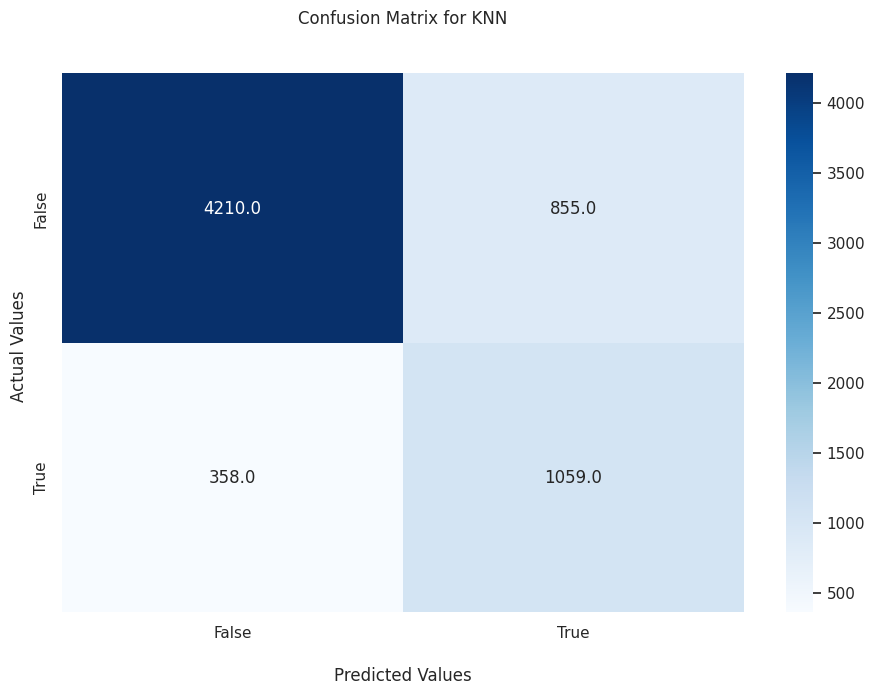

In [423]:
cf_matrix = confusion_matrix(y_test, knn_y_pred)
ax = sns.heatmap(cf_matrix, annot=True, fmt=".1f",cmap='Blues')

ax.set_title('Confusion Matrix for KNN\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

# **Logistic Regression**

In [424]:
#Logistic Regression
LR_model= LogisticRegression()
LR_model.fit(X_train,y_train)
LR_y_pred=LR_model.predict(X_test)
print('Logistic Regression\n', classification_report(y_test,LR_y_pred))

Logistic Regression
               precision    recall  f1-score   support

         0.0       0.92      0.79      0.85      5065
         1.0       0.50      0.77      0.61      1417

    accuracy                           0.78      6482
   macro avg       0.71      0.78      0.73      6482
weighted avg       0.83      0.78      0.80      6482



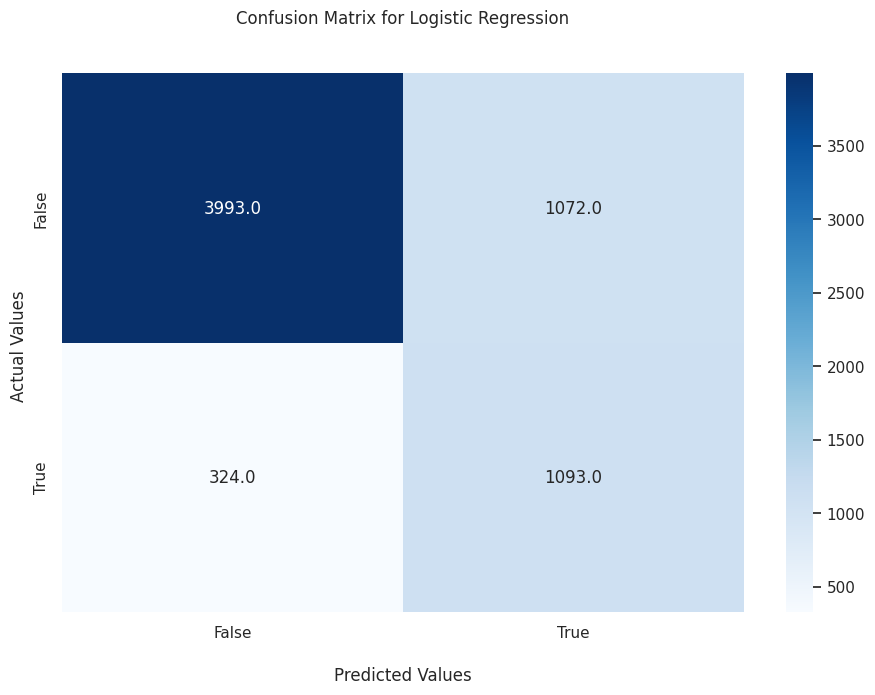

In [425]:
cf_matrix = confusion_matrix(y_test, LR_y_pred)
ax = sns.heatmap(cf_matrix, annot=True, fmt=".1f",cmap='Blues')

ax.set_title('Confusion Matrix for Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

# **Decision Tree**

In [426]:
#Decision Tree
decisiontree_model= DecisionTreeClassifier()
decisiontree_model.fit(X_train,y_train)
decisiontree_y_pred=decisiontree_model.predict(X_test)
print('Decision Tree\n', classification_report(y_test,decisiontree_y_pred))

Decision Tree
               precision    recall  f1-score   support

         0.0       0.94      0.90      0.92      5065
         1.0       0.69      0.78      0.73      1417

    accuracy                           0.87      6482
   macro avg       0.81      0.84      0.82      6482
weighted avg       0.88      0.87      0.88      6482



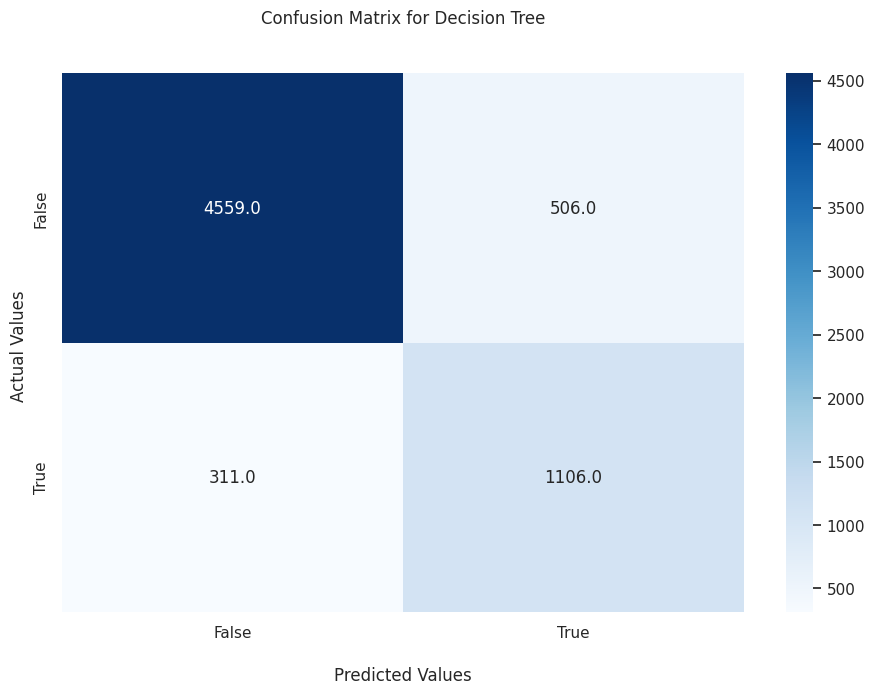

In [427]:
cf_matrix = confusion_matrix(y_test, decisiontree_y_pred)
ax = sns.heatmap(cf_matrix, annot=True, fmt=".1f",cmap='Blues')

ax.set_title('Confusion Matrix for Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

# **Random Forest Classifier**

In [428]:
# Random Forest Classifier
forest_model=  RandomForestClassifier()
forest_model.fit(X_train,y_train)
forest_y_pred=forest_model.predict(X_test)
print('Random Forest\n', classification_report(y_test, forest_y_pred))

Random Forest
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      5065
         1.0       0.94      0.75      0.83      1417

    accuracy                           0.93      6482
   macro avg       0.94      0.87      0.90      6482
weighted avg       0.94      0.93      0.93      6482



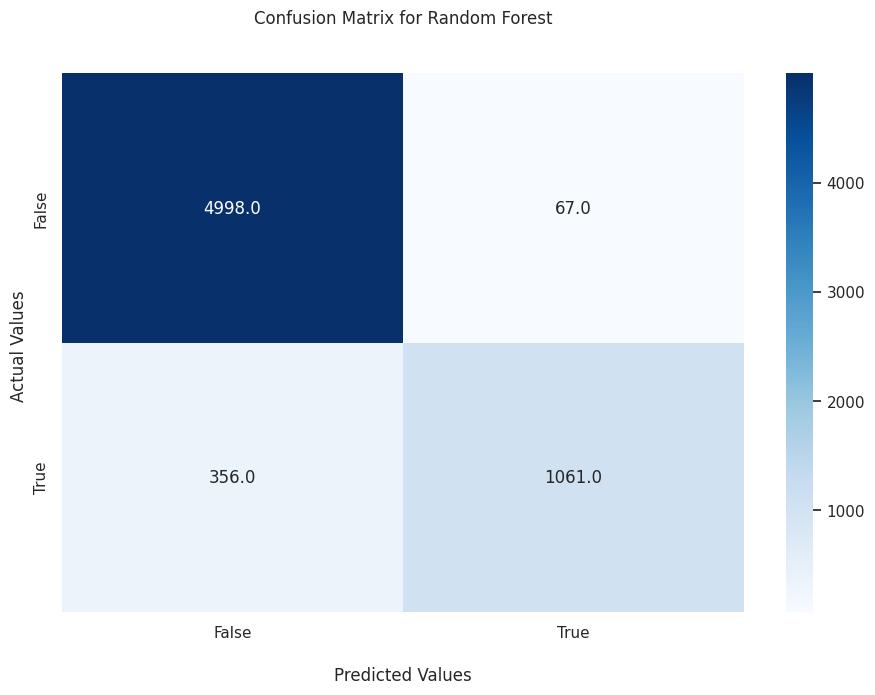

In [429]:
cf_matrix = confusion_matrix(y_test, forest_y_pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt=".1f",cmap='Blues')

ax.set_title('Confusion Matrix for Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

**We can observe that our model works better after handling the imprefect data.**

# XGBoost Classifier

In [430]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import xgboost as xgb

# ==========================
# 1. XGBoost Classifier
# ==========================
xgb_model = xgb.XGBClassifier(
    n_estimators=300,        # number of trees
    learning_rate=0.1,       # step size shrinkage
    max_depth=6,             # tree depth
    subsample=0.8,           # row sampling
    colsample_bytree=0.8,    # feature sampling
    random_state=42,
    use_label_encoder=False, # suppress warning
    eval_metric='logloss'    # evaluation metric
)

xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)

print("XGBoost Classifier\n", classification_report(y_test, xgb_y_pred))




XGBoost Classifier
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      5065
         1.0       0.96      0.75      0.84      1417

    accuracy                           0.94      6482
   macro avg       0.95      0.87      0.90      6482
weighted avg       0.94      0.94      0.93      6482



# Support Vector Machine

In [431]:

# ==========================
# 2. Support Vector Machine
# ==========================
svm_model = SVC(
    kernel='rbf',       # radial basis function kernel
    C=1.0,              # regularization parameter
    probability=True,   # enable probability estimates (needed for ROC-AUC)
    random_state=42
)

svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

print("Support Vector Machine\n", classification_report(y_test, svm_y_pred))

Support Vector Machine
               precision    recall  f1-score   support

         0.0       0.93      0.89      0.91      5065
         1.0       0.66      0.78      0.71      1417

    accuracy                           0.86      6482
   macro avg       0.80      0.83      0.81      6482
weighted avg       0.87      0.86      0.87      6482



# **Conclusion:**

---



---



After fitting and testing the different models on the data, Random Forest Regressor performed better than all other algorithms that we used and were able to predict the credit risk on our test set with an accuracy of 93%.

